In [1]:
from data_download_tool import download_data, summarize_s3_structure
from annotation_viewer import plot_annotations, plot_annotation_subset
from pandas_statistics import file_path_loader
from plots import *
from aws_s3_viewer import S3Client
import os
from utilities import get_folders_in_directory, summarize_local_files, clear_local_caches, clear_local_cache, apply_bbox_corrections, apply_bbox_corrections_list, recalculate_all_statistics, generate_plots, regenerate_plots, delete_large_annotations, save_torch_script_model

path = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw"

# View Fits File

SIMPLE: True
BITPIX: 16
NAXIS: 2
NAXIS1: 2394
NAXIS2: 1595
EXTEND: True
COMMENT:   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT:   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
BSCALE: 1
BZERO: 32768
OBSERVER: ATIK APX60 SN:1422202-0061
SBUUID: {7c04dda0-60ba-4a25-af0f-e2e6d63d68c8}
EXPTIME: 3.0
SWCREATE: TheSkyX Version 10.5.0 Build 11617
COLORCCD: 0
DISPINCR: 1
PICTTYPE: 1
IMAGETYP: Light Frame
XORGSUBF: 0
YORGSUBF: 0
XBINNING: 4
YBINNING: 4
CCD-TEMP: -14.3
SET-TEMP: -14.0
SITELAT: +20 44 47.04
SITELONG: -156 25 53.3
LST: +19 11 31.54
BTP: 0
CENTAZ: 252.697161537499
CENTALT: 30.8688239757414
AIRMASS: 1.94869945241952
TELEHA: +03 40 40.43
MOUNT: Paramount ME II
TELTKRA: 15.6212411
TELTKDEC: 1.1367898
OBJCTRA: 15 29 30.107
OBJCTDEC: -03 10 41.54
OBJECT: 40892
INSTRUME: ASCOM Camera
XPIXSZ: 15.039999961853
YPIXSZ: 15.039999961853
DATE-OBS: 2025-06-04T12:44:24.356
LOCALTIM: 6/4/2025 12:44:24.359 PM STD
TRKMODE: rate
ORCHCOMM: &57d

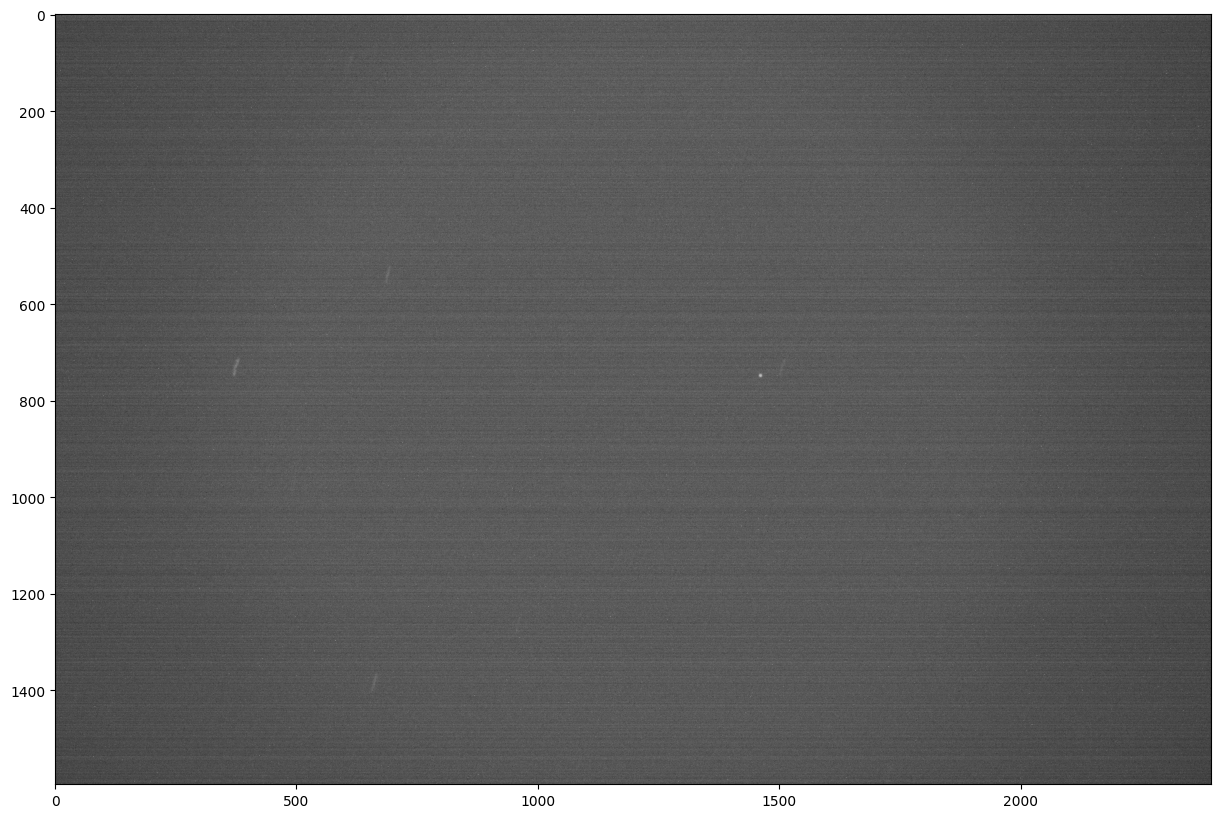

In [7]:
from astropy.io import fits
import numpy
import matplotlib.pyplot as plt
from preprocess_functions import iqr_log

fits_path = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2025-06-04/raw_fits/4519403345830983.fits"
hdu = fits.open(fits_path)
hdul = hdu[0]

for key,value in hdul.header.items():
    print(f"{key}: {value}")

print(hdul.data.dtype)
plt.figure(figsize=(20, 10))
plt.imshow(iqr_log(hdul.data).transpose(1,2,0))
plt.show()


# Get Folders in Directory

In [3]:
directory = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw"
for folder in get_folders_in_directory(directory):
    print(folder)

/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-08
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-09
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-10
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-11
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-12
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-13
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-29
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-08-04
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-08-13-blank
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-08-20
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024

# Summarize directory

In [8]:
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-08 281
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-29 643
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-09 455
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-10 1112
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-11 730
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-13 406
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-12 1382
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-20-blank 4133
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-08-24-blank 654
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-08-13-blank 1284
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-08-20 1209
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-08-04 535
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-11-15 672
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-11-07 1367
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-09-05-blank 824
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-10-15 1326
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-10-23 875
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-12-17 193
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-10-30 1086
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-09-13 1220
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-11-26 429
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-12-20 264
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-09-25 492
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-10-06 450
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-12-30 276
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-12-06 222
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2025-05-25 534
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2025-05-10 648
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2025-05-03 540
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2025-01-10 759
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2025-05-16 156
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2025-01-17-blank 1071
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2025-01-07 601
# /data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2025-01-23 2452
# Total Samples: 29281


summarize_local_files(path)

Path: /data/Sentinel_Datasets/LMNT02_Raw/LMNT02Sat-2024-09-06 Num Samples: 609
Path: /data/Sentinel_Datasets/LMNT02_Raw/LMNT02Sat-2024-08-30 Num Samples: 90
Path: /data/Sentinel_Datasets/LMNT02_Raw/LMNT02Sat-2024-07-11 Num Samples: 500
Path: /data/Sentinel_Datasets/LMNT02_Raw/LMNT02Sat-2024-11-14 Num Samples: 572
Path: /data/Sentinel_Datasets/LMNT02_Raw/LMNT02Sat-2024-11-07 Num Samples: 1122
Path: /data/Sentinel_Datasets/LMNT02_Raw/LMNT02Sat-2024-07-08 Num Samples: 775
Path: /data/Sentinel_Datasets/LMNT02_Raw/LMNT02Sat-2024-09-14 Num Samples: 1859
Path: /data/Sentinel_Datasets/LMNT02_Raw/LMNT02Sat-2024-08-21 Num Samples: 1068
Path: /data/Sentinel_Datasets/LMNT02_Raw/LMNT02Sat-2024-10-08 Num Samples: 463
Path: /data/Sentinel_Datasets/LMNT02_Raw/LMNT02Sat-2024-12-07 Num Samples: 522
Path: /data/Sentinel_Datasets/LMNT02_Raw/LMNT02Sat-2024-10-30 Num Samples: 570
Path: /data/Sentinel_Datasets/LMNT02_Raw/LMNT02Sat-2024-12-30-blank Num Samples: 3157
Path: /data/Sentinel_Datasets/LMNT02_Raw/LM

In [1]:
print(281+643+455+1112+730+406+1382+1209+535)

6753


# Generate Plots

In [ ]:
path1 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-14-injected"
path2 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-15-injected"
path3 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-16-injected"
path4 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-17-injected"
paths = [path1, path2, path3, path4]
for path in paths:
    generate_plots(path)

file
file
Plotting Error: Centroid positions
Plotting Error: Line Streaks


# Remove Excess Empty Frames

In [12]:
#Pandas dataframes for referenece
dataset_path = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-08-29"
local_files = file_path_loader(dataset_path)

image_attributes = local_files.statistics_file.sample_attributes
annotation_attributes = local_files.statistics_file.annotation_attributes

samples_to_remove = int(.75*len(image_attributes[image_attributes['num_objects'] == 0]))

local_files.delete_files_from_sample(image_attributes[image_attributes['num_objects'] == 0].sample(samples_to_remove))
local_files.recalculate_statistics()
regenerate_plots(dataset_path)

Plotting Error: Line Streaks


# Clear Local Cache

In [2]:
clear_local_caches(path)

Removed: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-04-24/annotations
Removed: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-04-24/images
Removed: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-04-25/annotations
Removed: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-04-25/images
Removed: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-04-26/annotations
Removed: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-04-26/images
Removed: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-04-27/annotations
Removed: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-04-27/images
Removed: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-04-28/annotations
Removed: /data/Dataset_Compila

# Apply bounding box corrections

In [4]:
path1 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-14-injected"
path2 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-15-injected"
path3 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-16-injected"
path4 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-17-injected"
paths = [path1, path2, path3, path4]

apply_bbox_corrections_list(paths)

/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-14-injected


100%|██████████| 460/460 [00:03<00:00, 123.67it/s]


New database created at /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-14-injected/RME04Sat-2024-05-14_Statistics.pkl


Recalculating Statistics: 100%|██████████| 460/460 [00:24<00:00, 19.13it/s]


/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-15-injected


100%|██████████| 180/180 [00:01<00:00, 150.58it/s]


New database created at /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-15-injected/RME04Sat-2024-05-15_Statistics.pkl


Recalculating Statistics: 100%|██████████| 180/180 [00:08<00:00, 20.37it/s]


/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-16-injected


100%|██████████| 300/300 [00:01<00:00, 169.98it/s]


New database created at /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-16-injected/RME04Sat-2024-05-16_Statistics.pkl


Recalculating Statistics: 100%|██████████| 300/300 [00:14<00:00, 20.31it/s]


/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-17-injected


100%|██████████| 180/180 [00:01<00:00, 170.36it/s]


New database created at /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-17-injected/RME04Sat-2024-05-17_Statistics.pkl


Recalculating Statistics: 100%|██████████| 180/180 [00:09<00:00, 19.67it/s]


In [3]:

S1 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-08" # 81
S2 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-09" # 53
S4 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-14" # 257
S5 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-15" # 99
S6 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-16" # 165
S9 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-31" # 832
S10 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-04" # 427
S12 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-05" # 607
S13 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-06" # 287
S14 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-07" # 536
S15 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-08" # 215
S17 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-10" # 420
S18 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-11" # 35
S19 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-12" # 430
S20 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-13" # 663
S21 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-15" # 189

new_sets = [S1, S2, S4, S5, S6, S9, S10, S12, S13, S14, S15, S17, S18, S19, S20, S21]

apply_bbox_corrections_list(new_sets)


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-08


100%|██████████| 142/142 [00:00<00:00, 244.04it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-08/RME04Sat-2024-05-08_Statistics.pkl


Recalculating Statistics: 100%|██████████| 142/142 [00:05<00:00, 24.39it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-09


100%|██████████| 92/92 [00:00<00:00, 188.76it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-09/RME04Sat-2024-05-09_Statistics.pkl


Recalculating Statistics: 100%|██████████| 92/92 [00:03<00:00, 25.98it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-14


100%|██████████| 460/460 [00:01<00:00, 252.16it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-14/RME04Sat-2024-05-14_Statistics.pkl


Recalculating Statistics: 100%|██████████| 460/460 [00:17<00:00, 26.69it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-15


100%|██████████| 180/180 [00:00<00:00, 214.03it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-15/RME04Sat-2024-05-15_Statistics.pkl


Recalculating Statistics: 100%|██████████| 180/180 [00:06<00:00, 27.59it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-16


100%|██████████| 300/300 [00:01<00:00, 255.70it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-16/RME04Sat-2024-05-16_Statistics.pkl


Recalculating Statistics: 100%|██████████| 300/300 [00:10<00:00, 27.29it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-31


100%|██████████| 1426/1426 [00:07<00:00, 192.23it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-31/RME04Sat-2024-05-31_Statistics.pkl


Recalculating Statistics: 100%|██████████| 1426/1426 [00:54<00:00, 26.17it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-04


100%|██████████| 736/736 [00:03<00:00, 184.46it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-04/RME04Sat-2024-06-04_Statistics.pkl


Recalculating Statistics: 100%|██████████| 736/736 [00:32<00:00, 22.36it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-05


100%|██████████| 744/744 [00:03<00:00, 196.51it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-05/RME04Sat-2024-06-05_Statistics.pkl


Recalculating Statistics: 100%|██████████| 744/744 [00:31<00:00, 23.71it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-06


100%|██████████| 245/245 [00:01<00:00, 201.23it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-06/RME04Sat-2024-06-06_Statistics.pkl


Recalculating Statistics: 100%|██████████| 245/245 [00:10<00:00, 24.17it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-07


100%|██████████| 459/459 [00:02<00:00, 204.17it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-07/RME04Sat-2024-06-07_Statistics.pkl


Recalculating Statistics: 100%|██████████| 459/459 [00:18<00:00, 24.31it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-08


100%|██████████| 184/184 [00:00<00:00, 208.36it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-08/RME04Sat-2024-06-08_Statistics.pkl


Recalculating Statistics: 100%|██████████| 184/184 [00:08<00:00, 22.01it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-10


100%|██████████| 360/360 [00:01<00:00, 251.38it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-10/RME04Sat-2024-06-10_Statistics.pkl


Recalculating Statistics: 100%|██████████| 360/360 [00:14<00:00, 24.96it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-11


100%|██████████| 30/30 [00:00<00:00, 211.43it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-11/RME04Sat-2024-06-11_Statistics.pkl


Recalculating Statistics: 100%|██████████| 30/30 [00:01<00:00, 22.13it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-12


100%|██████████| 368/368 [00:01<00:00, 214.17it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-12/RME04Sat-2024-06-12_Statistics.pkl


Recalculating Statistics: 100%|██████████| 368/368 [00:15<00:00, 23.37it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-13


100%|██████████| 566/566 [00:02<00:00, 212.32it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-13/RME04Sat-2024-06-13_Statistics.pkl


Recalculating Statistics: 100%|██████████| 566/566 [00:23<00:00, 23.65it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-15


100%|██████████| 162/162 [00:00<00:00, 214.22it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-15/RME04Sat-2024-06-15_Statistics.pkl


Recalculating Statistics: 100%|██████████| 162/162 [00:07<00:00, 22.83it/s]


# Recalculate All Statistics

In [ ]:
recalculate_all_statistics(path)


Num Samples: 1843
New database created at /mnt/c/Users/david.chaparro/Documents/Repos/Dataset_Statistics/data/LMNT01Sat-2025-04-30/LMNT01Sat-2025-04-30_Statistics.pkl


Recalculating Statistics:   1%|          | 22/1843 [00:10<13:53,  2.18it/s]


KeyboardInterrupt: 

# Convert Model to TorchScript

In [2]:
model_path = "/data/Sentinel_Datasets/Finalized_datasets/LMNT01Sat_Training_Channel_Mixture_C/models/LMNT01_MixtureC/retinanet_weights_E249.pt"
output_path = "/data/Sentinel_Datasets/Best_models"
name = "LMNT01"
save_torch_script_model(model_path, output_path,name)

/home/davidchaparro/miniconda3/envs/DatasetStatistics/lib/python3.12/site-packages/torch/nn/functional.py:4624: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  * torch.tensor(scale_factors[i], dtype=torch.float32)
/home/davidchaparro/miniconda3/envs/DatasetStatistics/lib/python3.12/site-packages/torchvision/ops/boxes.py:167: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  boxes_x = torch.min(boxes_x, torch.tensor(width, dtype=boxes.dtype, device=boxes.device))
/home/davidchaparro/miniconda3/envs/DatasetStatistics/lib/python3.12/site-packages/torchvision/ops/boxes.py:169: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detac

RuntimeError: Only tensors, lists, tuples of tensors, or dictionary of tensors can be output from traced functions

# Inject Targets from Numpy Arrays

In [4]:
path = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT02_Raw/LMNT02Sat-2024-12-30-injected"
segmentation_path = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Injection_targets"
local_files = file_path_loader(path)
local_files.inject_targets_from_numpy(segmentation_path)

  0%|          | 0/3157 [00:00<?, ?it/s]

100%|██████████| 3157/3157 [00:52<00:00, 60.64it/s]


New database created at /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT02_Raw/LMNT02Sat-2024-12-30-injected/LMNT02Sat-2024-12-30_Statistics.pkl


Recalculating Statistics: 100%|██████████| 3157/3157 [02:23<00:00, 22.07it/s]
